In [1]:
## import de LIBS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### Antes de começar: Análise de quais variáveis serão utilziadas
### Uma análise de correlação pode ser bem-vinda aqui para levar apenas as vars mais pertinentes
### ou até mesmo uma reunião com outras partes interessadas


# -- EXEMPLO DE ANÁLISE DE CORRELAÇÃO VIA SEABORN -- 
#plt.figure(figsize=(16, 6))
#heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('MATRIZ R2 DE CORRELACAO', fontdict={'fontsize':25}, pad=12);

In [2]:
### uma vez definidos os dados a se trabalhar constituímos o dataframe

df = pd.read_excel('dados.xlsx')
df

,var1,var2,var3
0,0.0,10.0,cat_a
1,0.1,10.5,cat_a
2,0.2,10.3,cat_a
3,5.0,62.0,cat_b
4,5.4,61.0,cat_b
5,5.2,60.0,cat_b
6,10.3,110.0,cat_c
7,10.2,111.0,cat_c
8,10.1,112.0,cat_c


<AxesSubplot: xlabel='var1', ylabel='var2'>

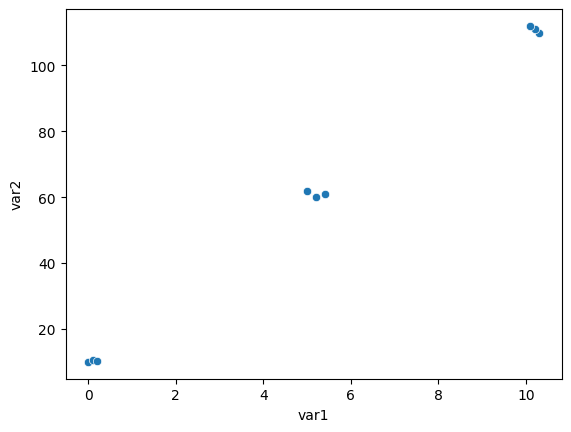

In [3]:
### observação dos dados numéricos num plano cartesiano dá uma DICA de haver 3 grupos
### mas é preciso corroborar esse fato
sns.scatterplot(x=df.var1, y=df.var2)

In [4]:
### PREPARAÇÃO DOS DADOS ###

In [5]:
### observação do MIN e MAX da primeira var numerica
df.var1.min(), df.var1.max()

(0.0, 10.3)

In [6]:
### observação do MIN e MAX da segunda var numerica
df.var2.min(), df.var2.max()

(10.0, 112.0)

In [7]:
# maximos muito discrepantes
# sendo as escalas tao diferentes ao se usar um classificador que envolva dists cartesianas
# pode "pesar" muito mais nos calcuos a var2 do que a var1,afinal sua magnute é maior
# é preciso portanto, normalizar as escalas

In [8]:
var1_norm = []
var2_norm = []

for i in range(0,len(df)):
    var1_norm.append( (df.var1.iloc[i]-df.var1.min())/(df.var1.max() - df.var1.min()) )
    var2_norm.append( (df.var2.iloc[i]-df.var2.min())/(df.var2.max() - df.var2.min()) )
    
df['var1_norm'] = var1_norm 
df['var2_norm'] = var2_norm

df

,var1,var2,var3,var1_norm,var2_norm
0,0.0,10.0,cat_a,0.000000,0.000000
1,0.1,10.5,cat_a,0.009709,0.004902
2,0.2,10.3,cat_a,0.019417,0.002941
3,5.0,62.0,cat_b,0.485437,0.509804
4,5.4,61.0,cat_b,0.524272,0.500000
5,5.2,60.0,cat_b,0.504854,0.490196
6,10.3,110.0,cat_c,1.000000,0.980392
7,10.2,111.0,cat_c,0.990291,0.990196
8,10.1,112.0,cat_c,0.980583,1.000000


<AxesSubplot: xlabel='var1_norm', ylabel='var2_norm'>

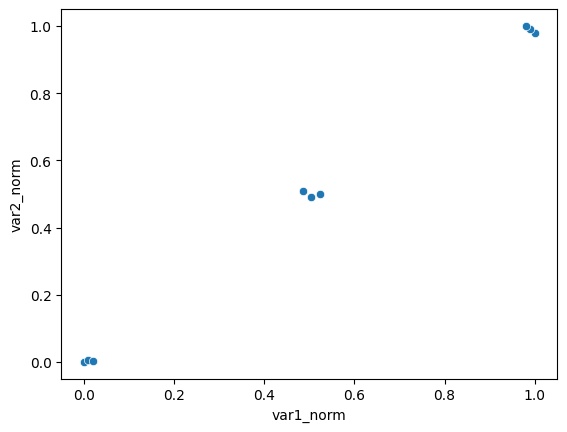

In [9]:
sns.scatterplot(x=df.var1_norm, y=df.var2_norm)

In [10]:
df_binario_categorica = pd.get_dummies(df["var3"])
df = pd.concat((df, df_binario_categorica), axis=1)
df

,var1,var2,var3,var1_norm,var2_norm,cat_a,cat_b,cat_c
0,0.0,10.0,cat_a,0.000000,0.000000,1,0,0
1,0.1,10.5,cat_a,0.009709,0.004902,1,0,0
2,0.2,10.3,cat_a,0.019417,0.002941,1,0,0
3,5.0,62.0,cat_b,0.485437,0.509804,0,1,0
4,5.4,61.0,cat_b,0.524272,0.500000,0,1,0
5,5.2,60.0,cat_b,0.504854,0.490196,0,1,0
6,10.3,110.0,cat_c,1.000000,0.980392,0,0,1
7,10.2,111.0,cat_c,0.990291,0.990196,0,0,1
8,10.1,112.0,cat_c,0.980583,1.000000,0,0,1


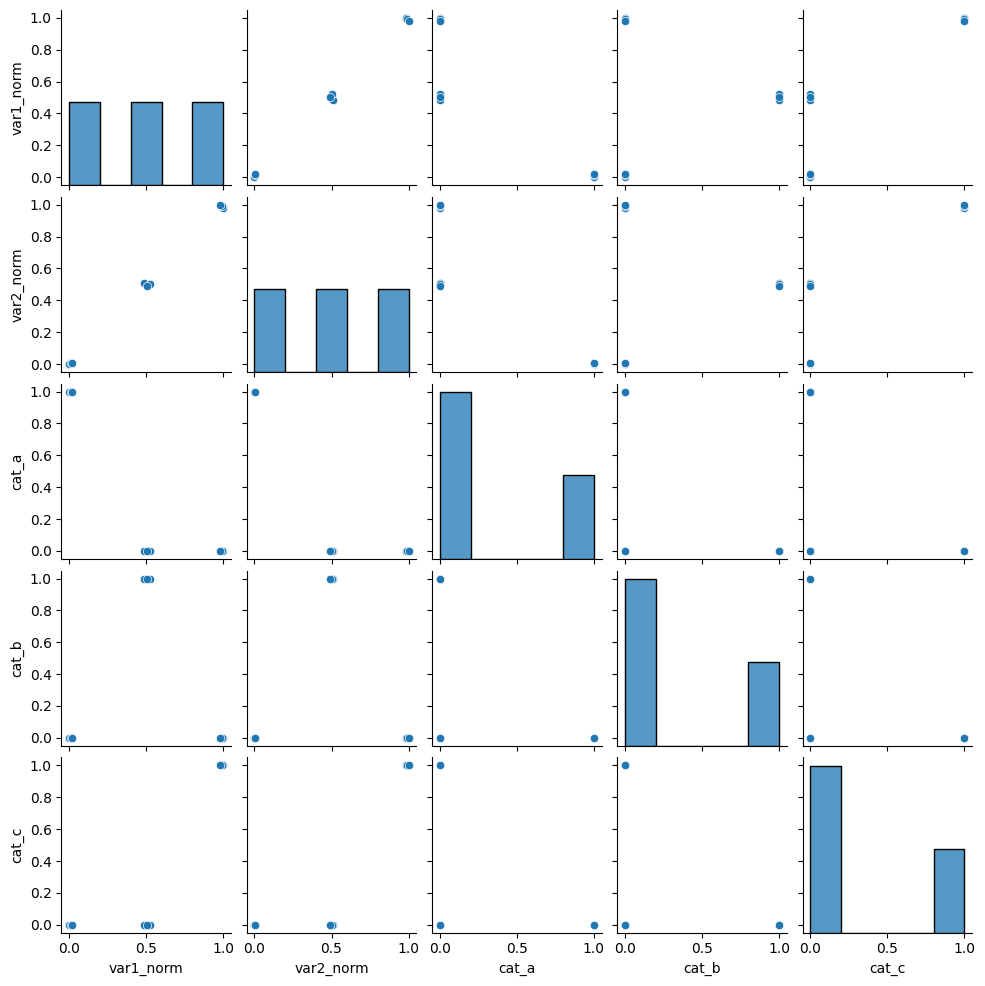

In [11]:
sns.pairplot(df[['var1_norm', 'var2_norm', 'cat_a', 'cat_b', 'cat_c']], height=2)

In [12]:
df_agrupamento = df[['var1_norm', 'var2_norm', 'cat_a', 'cat_b', 'cat_c']].copy()
df_agrupamento

,var1_norm,var2_norm,cat_a,cat_b,cat_c
0,0.000000,0.000000,1,0,0
1,0.009709,0.004902,1,0,0
2,0.019417,0.002941,1,0,0
3,0.485437,0.509804,0,1,0
4,0.524272,0.500000,0,1,0
5,0.504854,0.490196,0,1,0
6,1.000000,0.980392,0,0,1
7,0.990291,0.990196,0,0,1
8,0.980583,1.000000,0,0,1


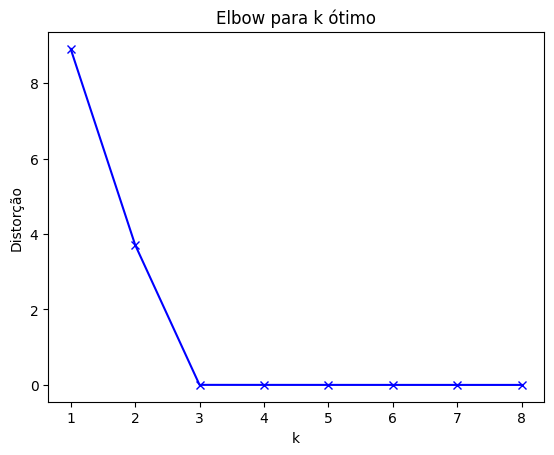

In [13]:
######   teste do cotovelo com grupos de 1 ate 8  ###############
#usando a biblioteca sklearn
from sklearn.cluster import KMeans

distorcao = []
for nclusters in range(1,9):

    kmeans = KMeans(n_clusters=nclusters, random_state=33)
    kmeans.fit(df_agrupamento)
    distorcao.append(kmeans.inertia_)



#### Plot para analise de sensibilidade e ganho informacional
K = range(1,9)
plt.plot(K, distorcao, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Elbow para k ótimo')
plt.show()

In [14]:
######################################
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=33)
kmeans.fit(df_agrupamento)

KMeans(n_clusters=3, random_state=33)

In [15]:
label = kmeans.fit_predict(df_agrupamento)

In [16]:
df['kmeans'] = label
df

,var1,var2,var3,var1_norm,var2_norm,cat_a,cat_b,cat_c,kmeans
0,0.0,10.0,cat_a,0.000000,0.000000,1,0,0,2
1,0.1,10.5,cat_a,0.009709,0.004902,1,0,0,2
2,0.2,10.3,cat_a,0.019417,0.002941,1,0,0,2
3,5.0,62.0,cat_b,0.485437,0.509804,0,1,0,0
4,5.4,61.0,cat_b,0.524272,0.500000,0,1,0,0
5,5.2,60.0,cat_b,0.504854,0.490196,0,1,0,0
6,10.3,110.0,cat_c,1.000000,0.980392,0,0,1,1
7,10.2,111.0,cat_c,0.990291,0.990196,0,0,1,1
8,10.1,112.0,cat_c,0.980583,1.000000,0,0,1,1


In [17]:
########################################

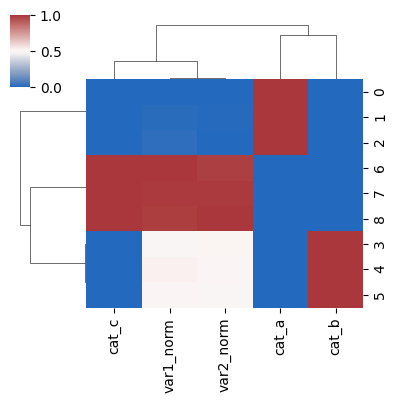

In [18]:
# plot
sns.clustermap(
  df_agrupamento, 
  metric="euclidean", #euclidean #correlation
  method="ward",      #ward #single
  cmap="vlag",
  figsize=(4,4),
)

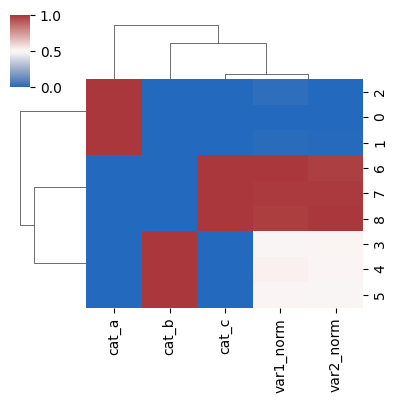

In [19]:
# plot
sns.clustermap(
  df_agrupamento, 
  metric="correlation", #euclidean #correlation
  method="single",      #ward #single
  cmap="vlag",
  figsize=(4,4),
)

In [20]:
from sklearn.cluster import AgglomerativeClustering

num_clusters = 3


# instanciando variável de modelo de agrupamento e passando parâmetros
model = AgglomerativeClustering(
  n_clusters=num_clusters, 
  #affinity='correlation', 
  #linkage='single'
    affinity='euclidean', 
    linkage='ward'
)
model.fit(df_agrupamento)

# realizando gravação dos labels
df['hca'] = model.labels_
df

,var1,var2,var3,var1_norm,var2_norm,cat_a,cat_b,cat_c,kmeans,hca
0,0.0,10.0,cat_a,0.000000,0.000000,1,0,0,2,1
1,0.1,10.5,cat_a,0.009709,0.004902,1,0,0,2,1
2,0.2,10.3,cat_a,0.019417,0.002941,1,0,0,2,1
3,5.0,62.0,cat_b,0.485437,0.509804,0,1,0,0,0
4,5.4,61.0,cat_b,0.524272,0.500000,0,1,0,0,0
5,5.2,60.0,cat_b,0.504854,0.490196,0,1,0,0,0
6,10.3,110.0,cat_c,1.000000,0.980392,0,0,1,1,2
7,10.2,111.0,cat_c,0.990291,0.990196,0,0,1,1,2
8,10.1,112.0,cat_c,0.980583,1.000000,0,0,1,1,2


In [24]:
n = 104		#tam da populacao
z = 1.96	#z-score
e = 5/100	#percentual de erro
p = 0.5 	#desvio padrao 


termo_1 = (z*z*p*(1-p))/(e*e)
termo_2 = 1+((z*z*p*(1-p))/(e*e*n))
tam_amostra = termo_1/termo_2
print('tamanho da amostra: ',int(tam_amostra))


#60 0.84
#70 1.03
#75 1.15
#80 1.28
#85 1.44
#90 1.65
#95 1.96
#99 2.58


### uma amostra de tamanho 81, tem 95% de confiança de que ela é representativa de um todo populacional de tam. 104

tamanho da amostra:  81
